In [149]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
df = pd.read_csv("AmesHousing.csv")
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [151]:
df.shape

(2930, 82)

In [153]:
# df = df.fillna(0)
# df = df.fillna(' ')
# df.dropna(axis=0, how='any', inplace=True)
df = df.fillna('WasNA')
df.to_csv('S.csv', index=False)
df.shape

(2930, 82)

In [155]:
# Utility functions from Tutorial
def make_mi_scores(X, y):
    X = X.copy()
    # for colname in X.select_dtypes(["object", "category"]):
    for colname in X.select_dtypes("object"):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    # discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    discrete_features = X.dtypes == int
    print('step 1')
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    print('step 2')
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    print('step 3')
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [157]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

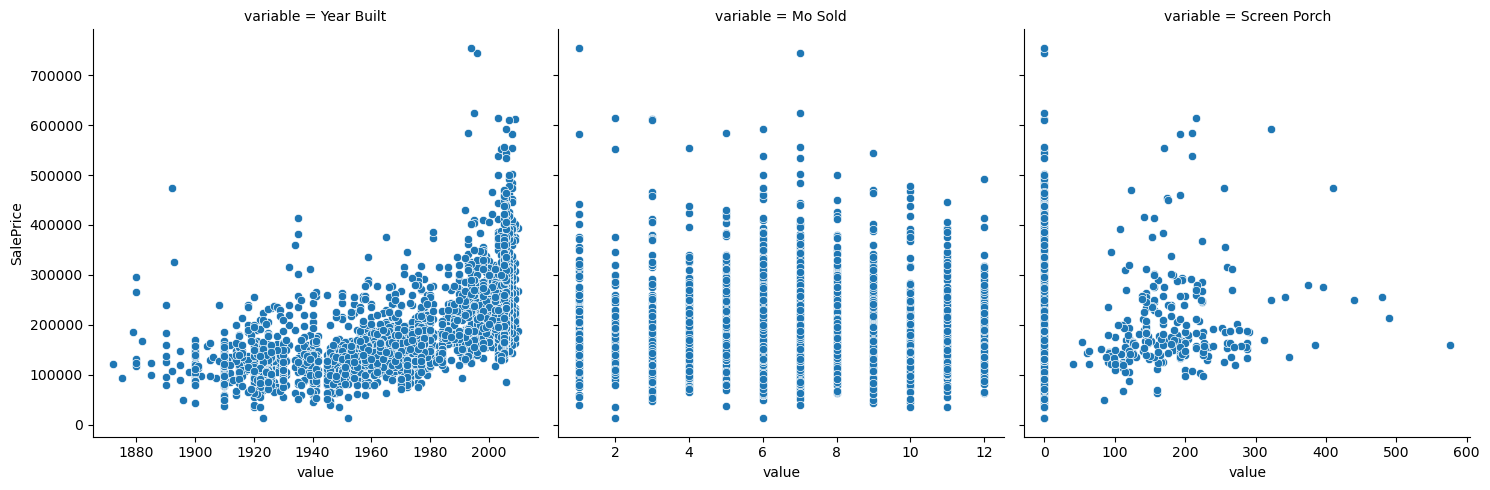

In [159]:
features = ["Year Built", "Mo Sold", "Screen Porch"]
sns.relplot(
    x="value", y="SalePrice", col="variable", data=df.melt(id_vars="SalePrice", value_vars=features), facet_kws=dict(sharex=False),
);

In [160]:
X = df.copy()
y = X.pop('SalePrice')

In [161]:
X.shape

(2930, 81)

In [165]:
mi_scores = make_mi_scores(X, y)

step 1
step 2
step 3


In [167]:
print(mi_scores.head(20))
# print(mi_scores.tail(20))  # uncomment to see bottom 20

Overall Qual      0.579768
Neighborhood      0.550474
Gr Liv Area       0.496672
Year Built        0.397619
Garage Cars       0.379633
1st Flr SF        0.371950
Bsmt Qual         0.363152
Exter Qual        0.324647
Garage Yr Blt     0.317644
Kitchen Qual      0.315829
Year Remod/Add    0.300348
MS SubClass       0.290649
Garage Area       0.283351
Order             0.281751
Full Bath         0.271742
Garage Finish     0.271072
PID               0.260954
Foundation        0.233996
Garage Type       0.233177
Fireplace Qu      0.219798
Name: MI Scores, dtype: float64


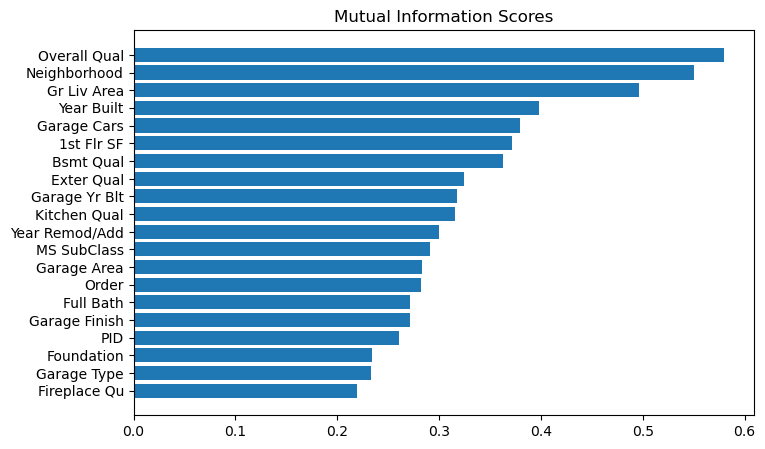

In [169]:
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores.head(20))
# plot_mi_scores(mi_scores.tail(20))  # uncomment to see bottom 20

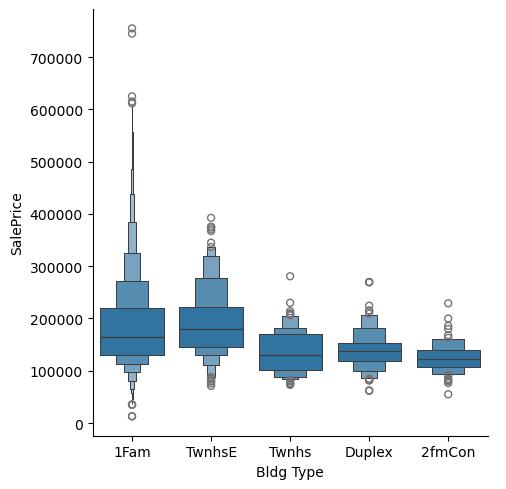

In [173]:
sns.catplot(x="Bldg Type", y="SalePrice", data=df, kind="boxen")

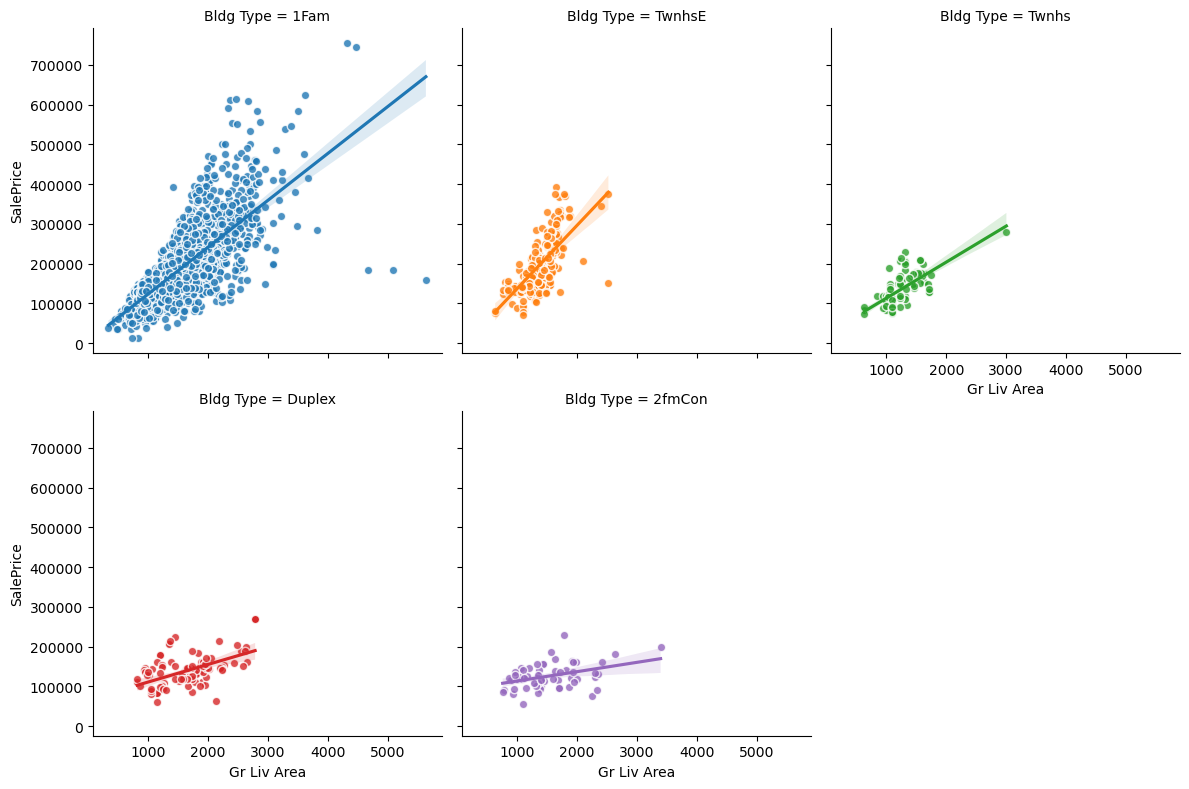

In [177]:
feature = "Gr Liv Area"
sns.lmplot(
    x=feature, y="SalePrice", hue="Bldg Type", col="Bldg Type",
    data=df, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,
);

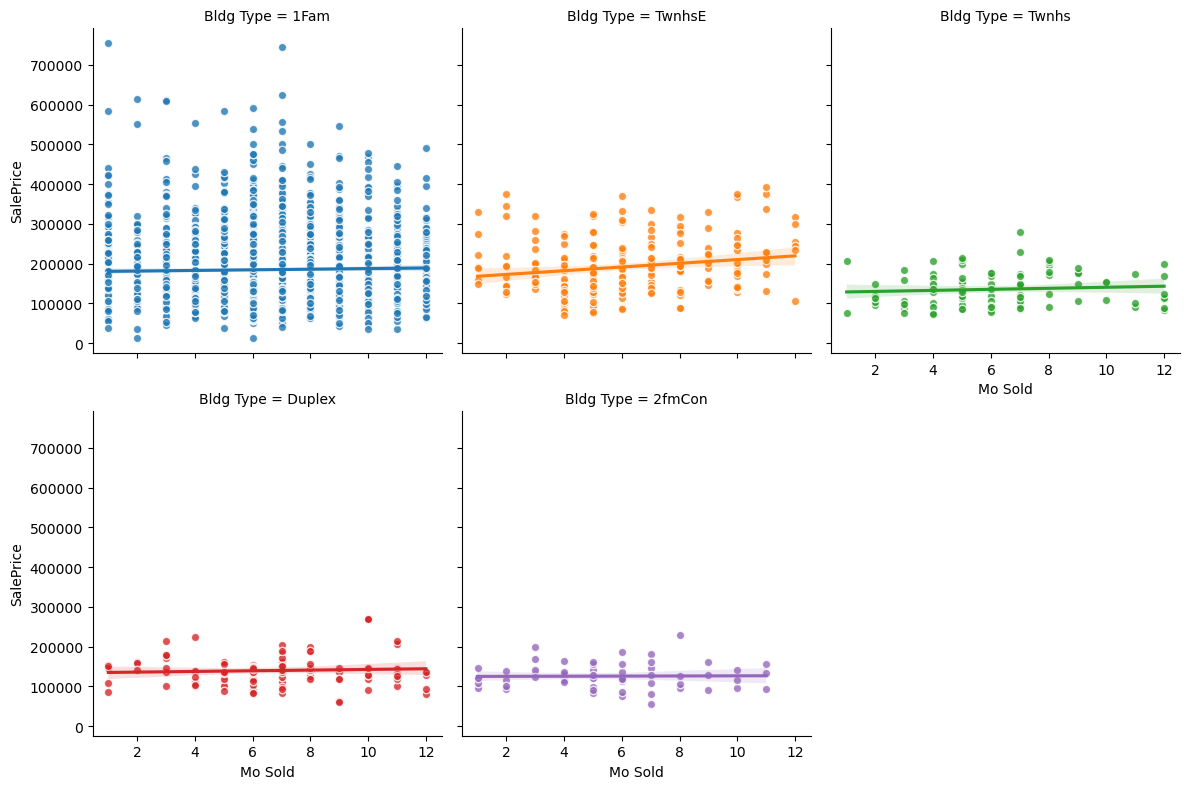

In [181]:
feature = "Mo Sold"
sns.lmplot(
    x=feature, y="SalePrice", hue="Bldg Type", col="Bldg Type",
    data=df, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,
);